#**Prueba FixPartnersConsulting**

Postulante: Matias Arriola

Se importan librerias a utilizar

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Se cargan archivos con datos

In [29]:

path = '/Diccionario prueba FIX.xlsx'
diccionario_prueba = pd.read_excel(path,index_col=0).to_dict()['pregunta']

path= '/Datos prueba Fix.csv'
datos_prueba = pd.read_csv(path,delimiter=';')


Se corrigen ids de preguntas para que coincidan con en ambos dataframe 

In [30]:
IDS=list(datos_prueba.columns)
names=list(diccionario_prueba.values())
nombres_productos={}
for i in  range(len(IDS)):
  nombres_productos[IDS[i]]=names[i]


Se observan dimensiones

In [31]:
print(pd.DataFrame(diccionario_prueba,index=[0]).shape)
print(datos_prueba.shape)

(1, 36)
(1998, 36)


Se obtienen estadísticos básicos

In [32]:
datos_prueba.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,P4,P7,P11,P12,P13,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
count,1998.000000,1996.000000,1993.000000,1998.000000,1998.000000,1998.000000,1994.00000,1991.000000,1995.000000,1998.000000,1985.000000,1995.000000,1998.000000,1994.000000,1998.000000,1983.000000,1998.000000,1994.000000,1998.000000,1996.000000,1998.000000,1998.000000,1992.000000,1994.000000,1995.000000,1998.000000,1991.000000,1998.000000,1998.000000
mean,1.138639,3.377756,1.055193,7.508509,1.478979,2.316817,2.57322,2.581617,2.425063,7.522523,2.428715,2.523810,4.175676,4.197593,6.420921,3.930913,3.972973,3.581244,4.148148,29.397295,3.832332,23.422923,3.735944,3.571214,3.662155,3.622623,3.780512,3.610110,3.453453
std,0.352825,1.361698,0.228414,2.386046,0.499683,1.334878,1.00969,0.983402,0.541899,223.663017,0.545400,0.540078,11.132950,8.914889,111.775145,0.893845,0.861617,0.969515,0.657055,1119.056580,0.874393,894.799130,0.854893,0.974946,0.898648,0.912128,0.896415,0.932707,1.001544
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-3.000000,1.000000,-4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,3.00000,3.000000,2.000000,3.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,4.000000,1.000000,8.000000,2.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,7.000000,2.000000,16.000000,2.000000,6.000000,4.00000,4.000000,4.000000,10000.000000,3.000000,4.000000,500.000000,400.000000,5000.000000,10.000000,7.000000,5.000000,5.000000,50000.000000,5.000000,40000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Se obtienen valores perdidos

([<matplotlib.axis.XTick at 0x7fcd493cabd0>,
 [Text(0, 0, 'D1'),
  Text(0, 0, 'D2'),
  Text(0, 0, 'D3'),
  Text(0, 0, 'D4'),
  Text(0, 0, 'D5'),
  Text(0, 0, 'D6'),
  Text(0, 0, 'D7'),
  Text(0, 0, 'D8'),
  Text(0, 0, 'P1'),
  Text(0, 0, 'P2'),
  Text(0, 0, 'P3'),
  Text(0, 0, 'P4'),
  Text(0, 0, 'P5'),
  Text(0, 0, 'P6'),
  Text(0, 0, 'P7'),
  Text(0, 0, 'P8'),
  Text(0, 0, 'P9'),
  Text(0, 0, 'P10'),
  Text(0, 0, 'P11'),
  Text(0, 0, 'P12'),
  Text(0, 0, 'P13'),
  Text(0, 0, 'P14'),
  Text(0, 0, 'P15'),
  Text(0, 0, 'P16'),
  Text(0, 0, 'P17'),
  Text(0, 0, 'P18'),
  Text(0, 0, 'P19'),
  Text(0, 0, 'P20'),
  Text(0, 0, 'P21'),
  Text(0, 0, 'P22'),
  Text(0, 0, 'P23'),
  Text(0, 0, 'P24'),
  Text(0, 0, 'P25'),
  Text(0, 0, 'P26'),
  Text(0, 0, 'P27'),
  Text(0, 0, 'P28')])

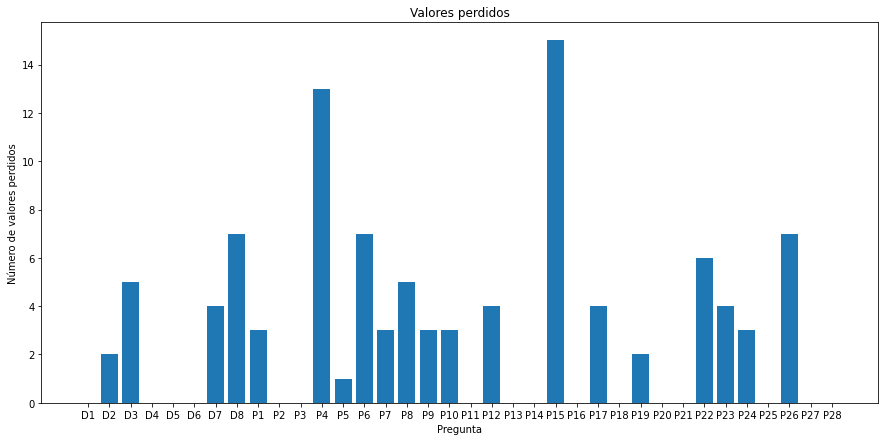

In [33]:


height = datos_prueba.isnull().sum().values
bars = datos_prueba.isnull().sum().index
x_pos = np.arange(len(bars))
 
plt.figure(figsize=(15, 7))
plt.bar(x_pos, height)
 
plt.title('Valores perdidos')
plt.xlabel('Pregunta')
plt.ylabel('Número de valores perdidos')

plt.xticks(x_pos, bars)


Se observa la distribución de los datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd492c9850>,
      dtype=object)

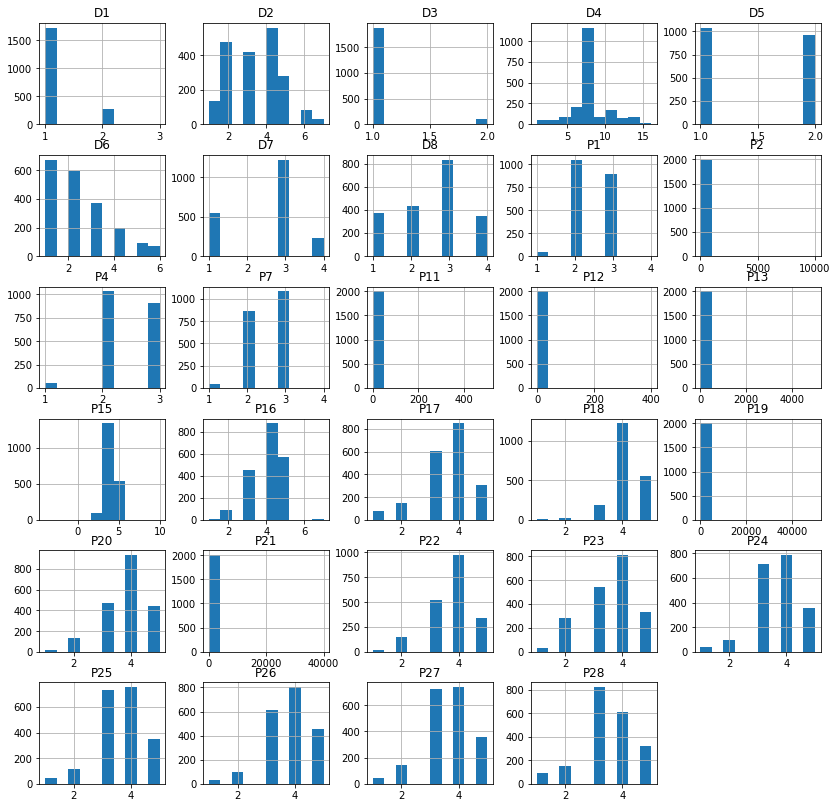

In [34]:
datos_prueba.hist(figsize=(14,14))

Se imputan por la media de la respectiva pregunta, tanto valores perdidos como valores que consistían en letras ('a' o 'b' por ejemplo)

In [35]:

for col in datos_prueba.columns:
    datos_prueba[col] = pd.to_numeric(datos_prueba[col].astype(str).str.replace(',',''), errors='coerce')

datos_prueba.fillna(value=datos_prueba.mean(),inplace=True)
#print(datos_prueba.isnull().sum())

Se observan nuevamente estadísticos

In [36]:
datos_prueba.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1.998000e+03,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1.138639,3.377756,1.055193,7.508509,1.478979,2.316817,2.573220,2.581617,2.425063,7.522523,2.481964,2.428715,3.428858,2.491457,2.523810,2.012060e+03,3.827396,10.473156,4.175676,4.197593,6.420921,204.279920,3.930913,3.972973,3.581244,4.148148,29.397295,3.832332,23.422923,3.735944,3.571214,3.662155,3.622623,3.780512,3.610110,3.453453
std,0.352825,1.361016,0.228128,2.386046,0.499683,1.334878,1.008678,0.981677,0.541492,223.663017,0.534419,0.543622,44.692657,0.540477,0.539672,8.948732e+04,0.784369,168.670418,11.132950,8.905956,111.775145,8948.657252,0.890481,0.861617,0.968543,0.657055,1118.496071,0.874393,894.799130,0.853608,0.973970,0.897973,0.912128,0.894842,0.932707,1.001544
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,-1.000000,1.000000,-3.000000,1.000000,1.000000,-4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,4.000000,1.000000,8.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000e+00,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,7.000000,2.000000,16.000000,2.000000,6.000000,4.000000,4.000000,4.000000,10000.000000,4.000000,3.000000,2000.000000,3.000000,4.000000,4.000000e+06,5.000000,5000.000000,500.000000,400.000000,5000.000000,400000.000000,10.000000,7.000000,5.000000,5.000000,50000.000000,5.000000,40000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Se analiza existencia de outliers

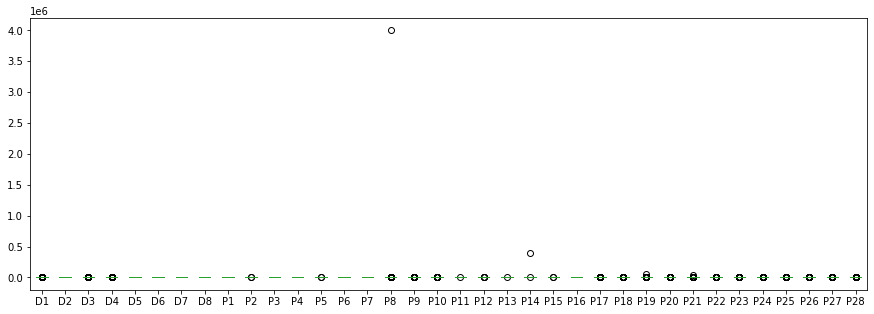

In [37]:
datos_prueba.boxplot(figsize=(15,5),grid=False)


Se eliminan outliers, seleccionando del cuartil 25 hasta el percentil 95. 

In [12]:
cols = datos_prueba.columns
Q1 = datos_prueba.quantile(0.25)
Q3 = datos_prueba.quantile(0.95)
IQR = Q3 - Q1

datos_prueba = datos_prueba[~((datos_prueba[cols] < (Q1 - 1.5 * IQR)) |(datos_prueba[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Se observa nuevamente existencia de outliers

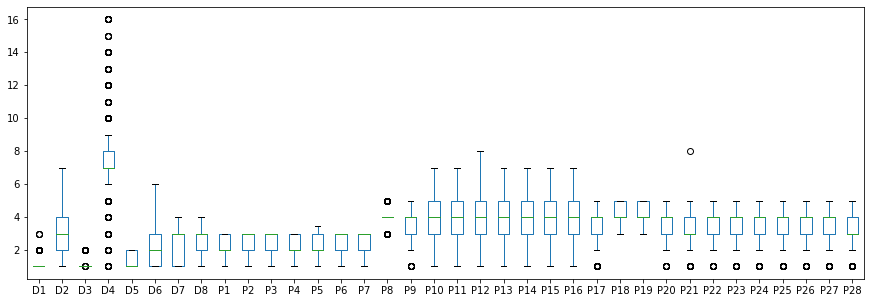

In [13]:
 datos_prueba.describe()
 datos_prueba.boxplot(figsize=(15,5),grid=False)

Se observan nuevamente estadísticos 

In [14]:
datos_prueba.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,1.132196,3.350083,1.053452,7.521322,1.488273,2.305970,2.551329,2.585326,2.430091,2.526119,2.491452,2.442203,2.440223,2.504228,2.536552,4.088486,3.874273,3.953092,3.919510,3.995624,3.920576,3.982942,3.934949,3.968550,3.625973,4.206823,4.424307,3.864072,3.426439,3.765036,3.604782,3.692957,3.654051,3.813147,3.645522,3.487207
std,0.345034,1.358502,0.224684,2.380829,0.499996,1.326725,1.012213,0.975879,0.536330,0.544412,0.527820,0.535437,0.526382,0.530141,0.530532,0.610709,0.740268,0.870822,0.878437,0.864444,0.888194,0.885876,0.864448,0.867531,0.933025,0.574922,0.583439,0.852397,0.982744,0.836067,0.958932,0.877719,0.894570,0.871424,0.913097,0.981072
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,4.000000,1.000000,8.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,7.000000,2.000000,16.000000,2.000000,6.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.428858,3.000000,3.000000,5.000000,5.000000,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Distribuciones finales

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd593c9d50>,
      dtype=object)

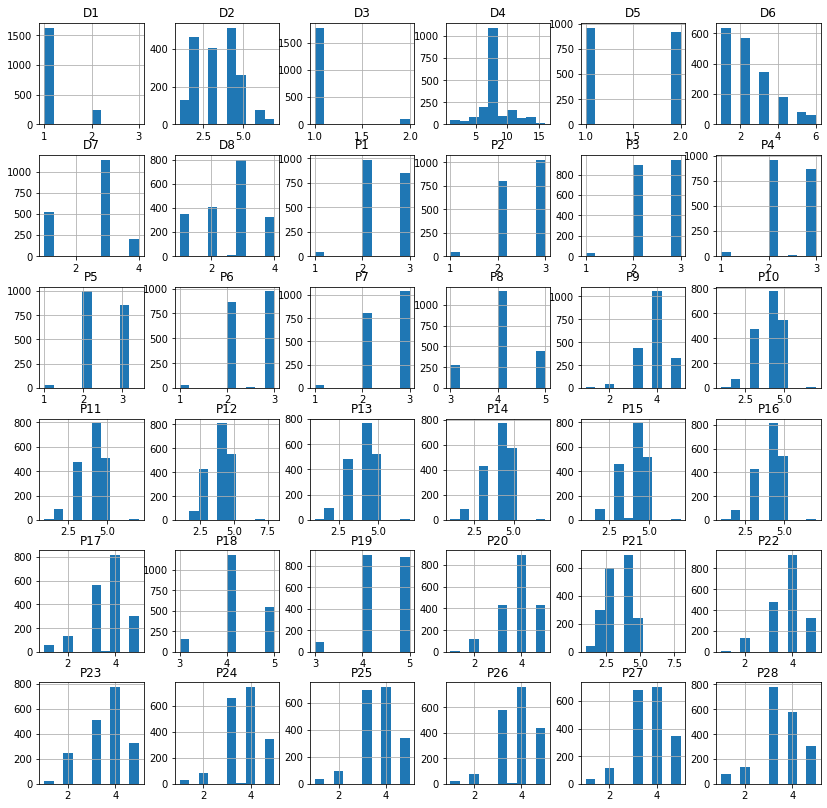

In [15]:
datos_prueba.hist(figsize=(14,14))

Se observa correlación entre las variables

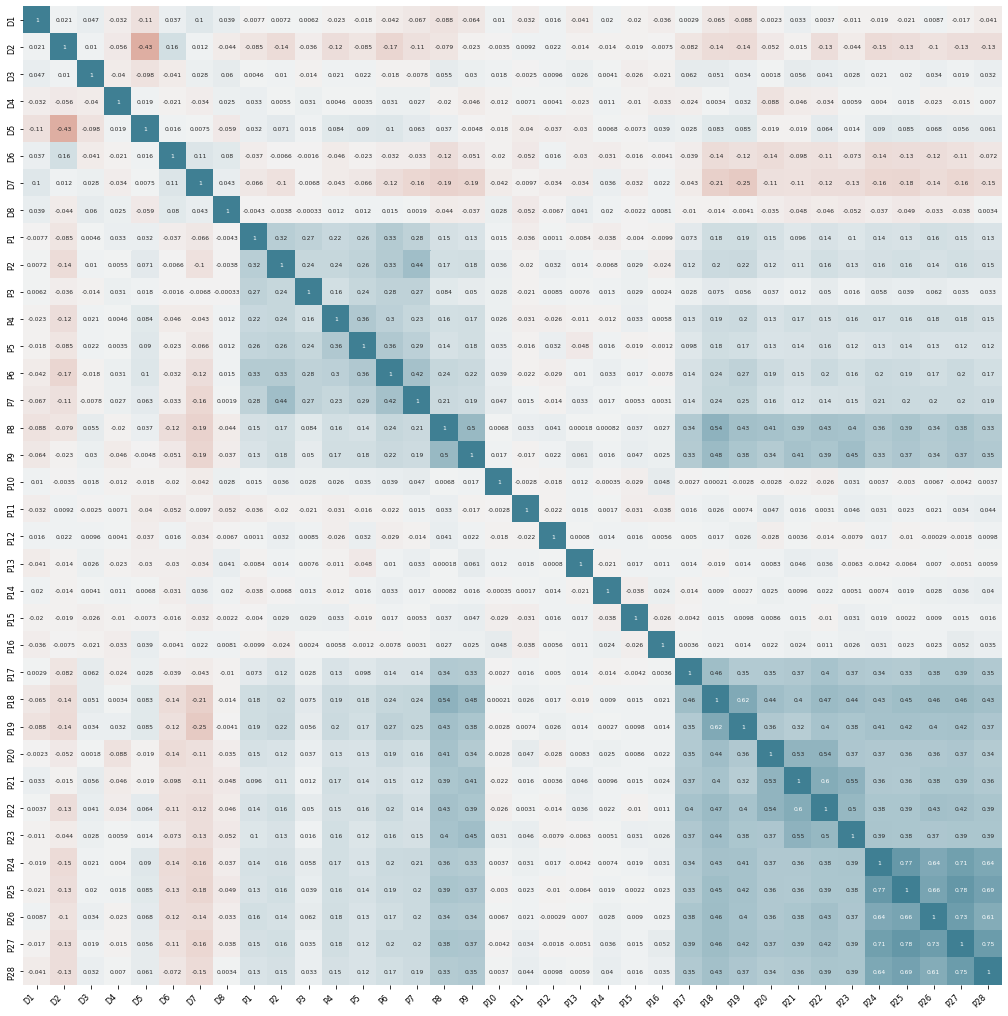

In [16]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

sns.heatmap(
    datos_prueba.corr(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

**Satisfacción de evaluación**

Se eliminan preguntas tipo D, y se realiza la regresión, eliminando también en cada regresión la otra variable a analizar (satisfacción total de los clientes o si estos recomendarían, según corresponda), dado que están altamente correlacionadas.

In [17]:
datos_regresion=datos_prueba.copy()
datos_regresion.drop(columns=['D1',	'D2'	,'D3'	,'D4',	'D5',	'D6',	'D7',	'D8','P19'], inplace=True)


nombres_preguntas=list(datos_regresion.columns)
nombres_preguntas.remove('P18')

nombres_preguntas=[nombres_productos[i] for i in nombres_preguntas]

Matriz de correlaciones solo entre preguntas 

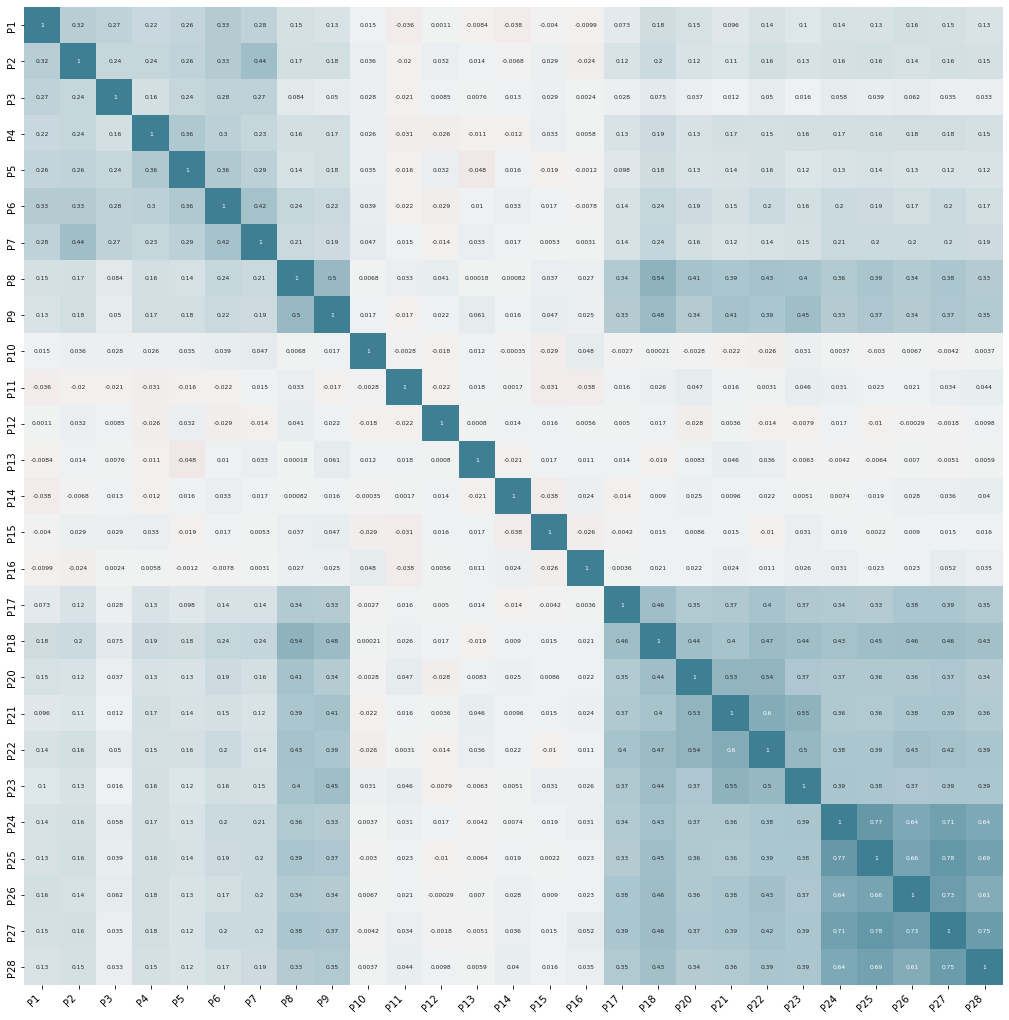

In [18]:
fig, axx = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

sns.heatmap(
    datos_regresion.corr(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = axx
)
axx.set_xticklabels(
    axx.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Se realiza regresión y se obtienen importancias 

([<matplotlib.axis.XTick at 0x7fcd4d730050>,
 [Text(0, 0, 'la tienda ofrece una buena calidad de productos'),
  Text(0, 0, 'la tienda ofrece precios atractivos'),
  Text(0, 0, 'la tienda ofrece una relación precio - calidad superior a la competencia'),
  Text(0, 0, 'la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas'),
  Text(0, 0, 'la tienda cuenta con variedad de productos en tiendas'),
  Text(0, 0, 'la tienda ofrece productos a la moda'),
  Text(0, 0, 'la tienda ofrece promociones atractivas'),
  Text(0, 0, 'Ubicación productos es buena'),
  Text(0, 0, 'Disponibilidad de productos es buena'),
  Text(0, 0, 'Asistencia en sala de ventas es buena'),
  Text(0, 0, 'Rapidez filas cajas es buena'),
  Text(0, 0, 'Promoción de productos es buena'),
  Text(0, 0, 'Información de precios es buena'),
  Text(0, 0, 'Limpieza tiendas es buena'),
  Text(0, 0, 'Atención de cajeras es buena'),
  Text(0, 0, 'Método de pago son buenos'),
  Text(0, 0, 'Disponibilidad de cajas para pa

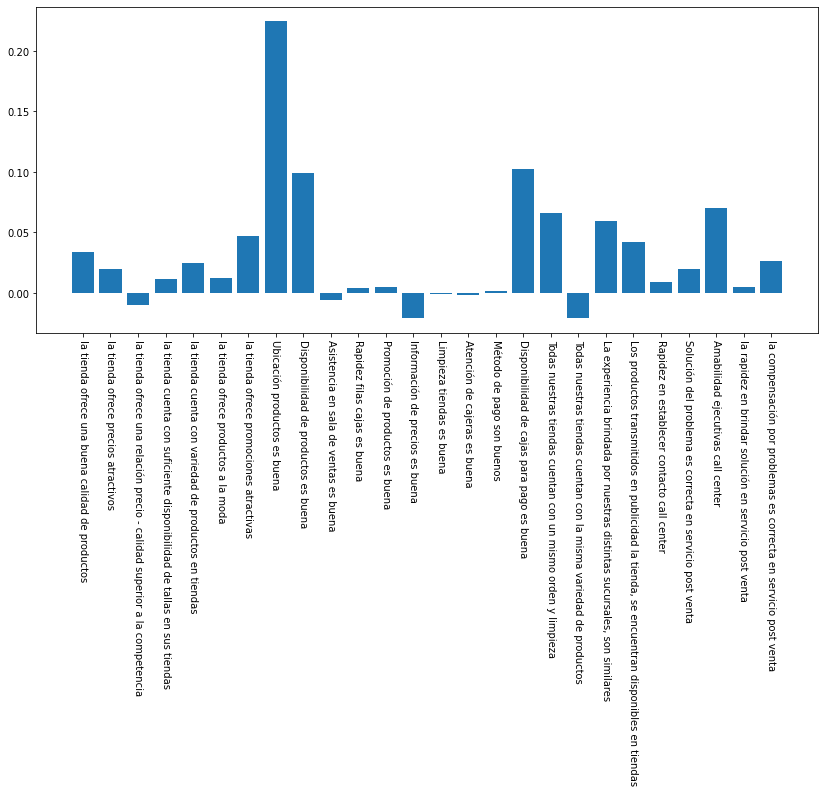

In [19]:



model = LinearRegression()

model.fit(datos_regresion.loc[:, datos_regresion.columns != 'P18'],datos_regresion['P18'])

importance = model.coef_ # coeficients beta_i de la regresión

plt.figure(figsize=(14, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)), nombres_preguntas, rotation=270)


Se obtiene tabla cruzada entre variables analizada y edad

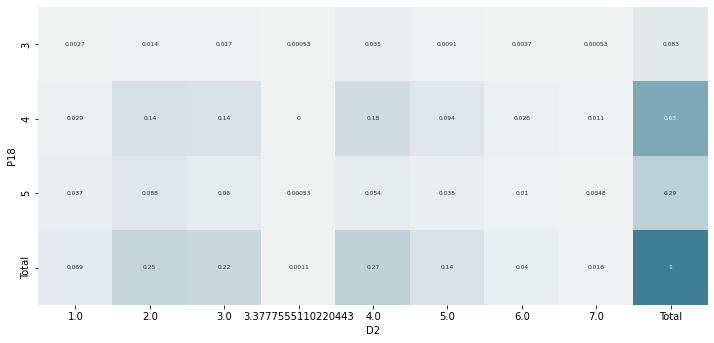

In [20]:

# Tabla de contingencia class 
#pd.crosstab(datos_prueba['P18'],
 #           columns=datos_prueba['D2'], margins=True,margins_name="Total", normalize=True)


fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))


sns.heatmap(
    pd.crosstab(datos_regresion['P18'],
            columns=datos_prueba['D2'], margins=True,margins_name="Total", normalize=True),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax1
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
  
)

ax.tick_params(labelsize = 8)

Tabla cruzada entre variable analizada y género





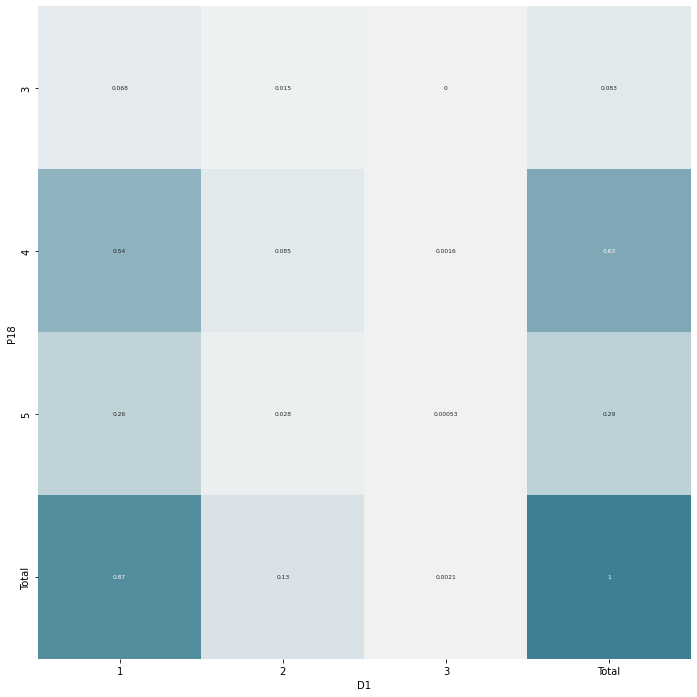

In [21]:
fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    pd.crosstab(datos_regresion['P18'],
            columns=datos_prueba['D1'], margins=True,margins_name="Total", normalize=True),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax3
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
  
)

ax.tick_params(labelsize = 8)

Variación por edad y genero

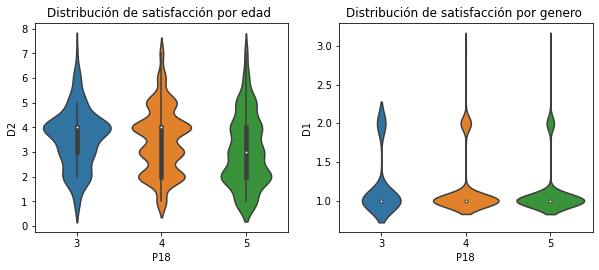

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10, 3.84))

sns.violinplot(
        x     = 'P18',
        y     = 'D2',
        data  = datos_prueba,
        #color = "white",
        ax    = axs[0]
    )

axs[0].set_title('Distribución de satisfacción por edad ');

sns.violinplot(
        x     = 'P18',
        y     = 'D1',
        data  = datos_prueba,
        #color = "white",
        ax    = axs[1]
    )

axs[1].set_title('Distribución de satisfacción por genero ');

**Recomendar**

Se prosigue de manera similar que para el caso anterior

In [23]:
datos_regresion=datos_prueba.copy()
datos_regresion.drop(columns=['D1',	'D2'	,'D3'	,'D4',	'D5',	'D6',	'D7',	'D8','P18'], inplace=True)


nombres_preguntas=list(datos_regresion.columns)
nombres_preguntas.remove('P19')
nombres_preguntas=[nombres_productos[i] for i in nombres_preguntas]

([<matplotlib.axis.XTick at 0x7fcd49910fd0>,
 [Text(0, 0, 'la tienda ofrece una buena calidad de productos'),
  Text(0, 0, 'la tienda ofrece precios atractivos'),
  Text(0, 0, 'la tienda ofrece una relación precio - calidad superior a la competencia'),
  Text(0, 0, 'la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas'),
  Text(0, 0, 'la tienda cuenta con variedad de productos en tiendas'),
  Text(0, 0, 'la tienda ofrece productos a la moda'),
  Text(0, 0, 'la tienda ofrece promociones atractivas'),
  Text(0, 0, 'Ubicación productos es buena'),
  Text(0, 0, 'Disponibilidad de productos es buena'),
  Text(0, 0, 'Asistencia en sala de ventas es buena'),
  Text(0, 0, 'Rapidez filas cajas es buena'),
  Text(0, 0, 'Promoción de productos es buena'),
  Text(0, 0, 'Información de precios es buena'),
  Text(0, 0, 'Limpieza tiendas es buena'),
  Text(0, 0, 'Atención de cajeras es buena'),
  Text(0, 0, 'Método de pago son buenos'),
  Text(0, 0, 'Disponibilidad de cajas para pa

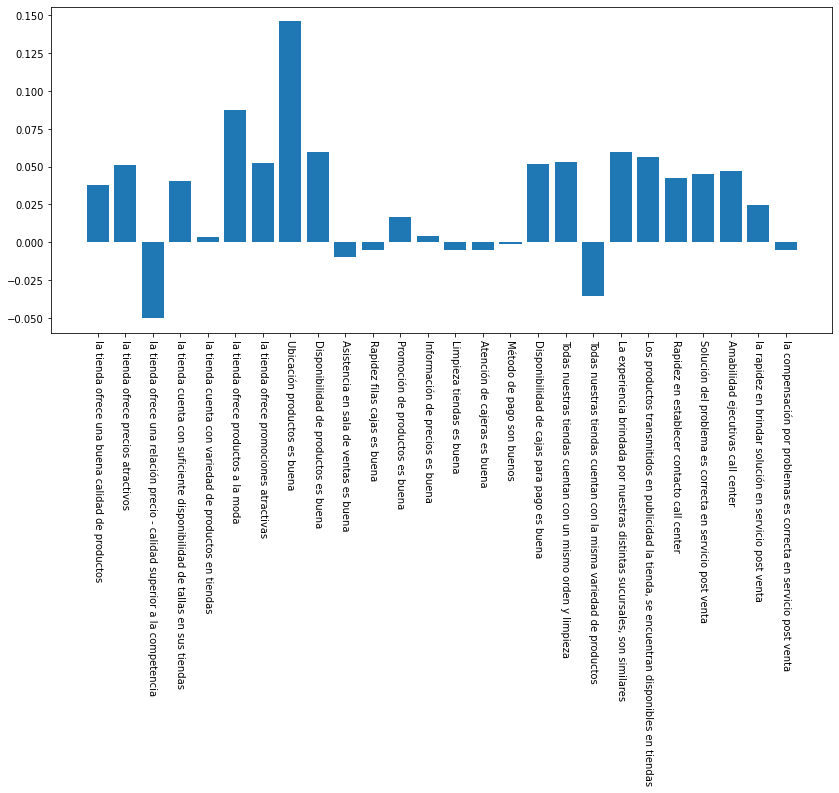

In [24]:
model = LinearRegression()

model.fit(datos_regresion.loc[:, datos_regresion.columns != 'P19'], datos_regresion['P19'])

importance = model.coef_

plt.figure(figsize=(14, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)), nombres_preguntas, rotation=270)

Variación por edad

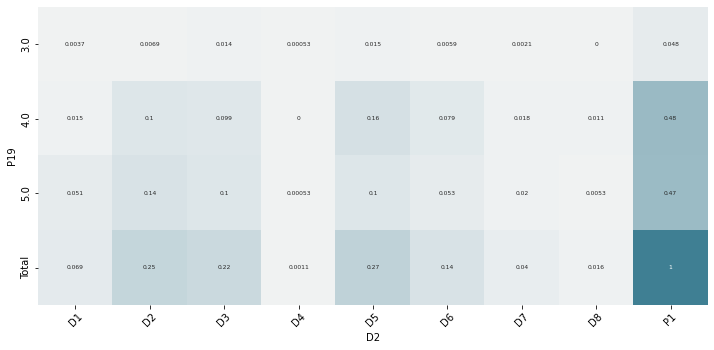

In [25]:
# Tabla de contingencia 
#pd.crosstab(datos_prueba['P19'],
 #           columns=datos_prueba['D2'], margins=True,margins_name="Total", normalize=True)

fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))


sns.heatmap(
    pd.crosstab(datos_prueba['P19'],
            columns=datos_prueba['D2'], margins=True,margins_name="Total", normalize=True),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax2
)
ax2.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
  
)

ax.tick_params(labelsize = 8)



Variación por género

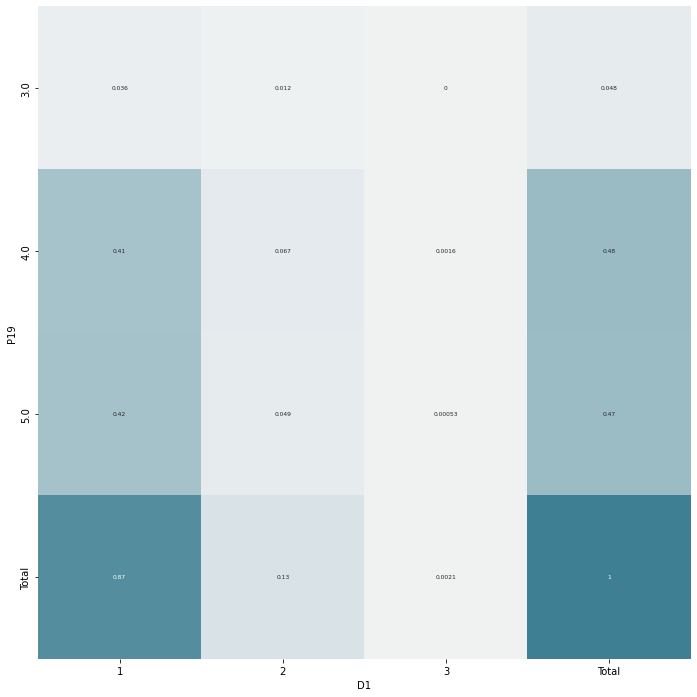

In [26]:

fig, ax4= plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    pd.crosstab(datos_prueba['P19'],
            columns=datos_prueba['D1'], margins=True,margins_name="Total", normalize=True),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax4
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
  
)

ax.tick_params(labelsize = 8)

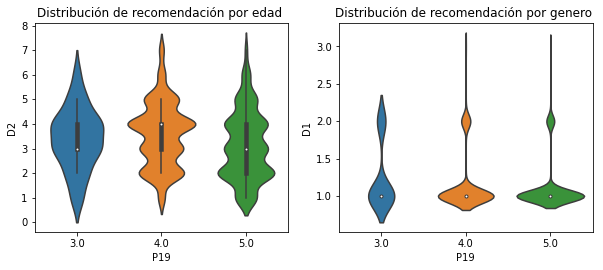

In [27]:
fig, axs1 = plt.subplots(nrows=1, ncols=2,figsize=(10, 3.84))

sns.violinplot(
        x     = 'P19',
        y     = 'D2',
        data  = datos_prueba,
        #color = "white",
        ax    = axs1[0]
    )

axs1[0].set_title('Distribución de recomendación por edad ');

sns.violinplot(
        x     = 'P19',
        y     = 'D1',
        data  = datos_prueba,
        #color = "white",
        ax    = axs1[1]
    )

axs1[1].set_title('Distribución de recomendación por genero ');